# TD4 - Python for data analysis

# MAP/FILTER

### MAP

In [1]:
func_deux_fois  = lambda param : param*2
zero_dix_huit = [func_deux_fois(_) for _ in range(10)]
zero_dix_huit

[0, 2, 4, 6, 8, 10, 12, 14, 16, 18]

In [2]:
# JE VEUX APPLIQUER UNE FONCTION SUR CHAQUE ITEM DE LA LISTE SOURCE ET RENVOYER UNE NOUVELLE LISTE
r = []
for _ in zero_dix_huit:
    r.append(_+1)
r

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19]

In [3]:
# EN UNE LIGNE AVEC MAP 
r = list( map ( lambda x: x+1, zero_dix_huit ))
r

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19]

In [4]:
# EQUIVALENT A ... UNE COMPREHENSION LIST !
r = [ x+1 for x in zero_dix_huit ]
r

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19]

### FILTER

In [5]:
# filter() renvoie un itérateur
iterateur = filter(lambda x: x>10, zero_dix_huit) # LE filtre doit avoir comme condition un résultat soit vraie ou fausse
liste     = list(iterateur)
liste

[12, 14, 16, 18]

In [6]:
# ITERATEUR ?
# c'est un objet dont on peut parcourir les valeurs une à une
# str, tuple, list, dict et set sont des itérables dont on peut obtenir un itérateur avec iter
# un intérateur garde en mémoire l'index du dernier élément accédé

mylist = ["pomme", "tournevis", "haricot"]
myit = iter(mylist)

print(next(myit))
print(next(myit))
print(next(myit))

pomme
tournevis
haricot


In [7]:
iterateur = filter(lambda x: x>10, zero_dix_huit)
print(next(iterateur))
print(next(iterateur))

12
14


In [8]:
# L'appel à list() permet de récupérer la liste des éléments non encore accédés d'un itérateur
print(list(iterateur))

[16, 18]


In [9]:
iterateur = filter(lambda x: x>10, zero_dix_huit)
print(next(iterateur))
print(list(iterateur))
print(list(iterateur))

12
[14, 16, 18]
[]


In [10]:
chaine = 'hello world'
iterateur = iter(chaine)
print(next(iterateur))
print(next(iterateur))
print(next(iterateur))
print(list(iterateur))

h
e
l
['l', 'o', ' ', 'w', 'o', 'r', 'l', 'd']


In [11]:
# Et comme pour MAP, on peut aussi utiliser une COMPREHENSION LIST..
liste= [x for x in zero_dix_huit if x>10]
liste

[12, 14, 16, 18]

### F-STRING

In [12]:
# Python offers many ways to display variables and expressions in a string literal  :

temp="25"
ville="Veracruz"


# CONCATENATION :

print("Il fait "+temp+" degrés à "+ville)

Il fait 25 degrés à Veracruz


In [13]:
# %-FORMATTED STRINGS

print( "Il fait %s degrés à %s " % (temp,ville) ) # les variables en tuples !

Il fait 25 degrés à Veracruz 


In [14]:
# string.format

print("Il fait {} degrés à {}".format(temp,ville))

Il fait 25 degrés à Veracruz


In [15]:
# F-strings are a recent Python Enhancement. They came with Python 3.6,in 2015  
# They make formatting easier to write and read
# They always start with an "f" before the quotation mark

print( f"Il fait {temp} degrés à {ville}" )

Il fait 25 degrés à Veracruz


In [16]:
# You can put any valid Python expression inside the braces :
print( f"Il fait {2*temp} degrés à {ville}" )
print( f"Il fait {2*int(temp)} degrés à {ville.upper()}" )

Il fait 2525 degrés à Veracruz
Il fait 50 degrés à VERACRUZ


In [17]:
import pandas as pd
nat= pd.read_csv("/Users/J-Luc/Desktop/Esilv5A/PythonForDA/Python-for-data-analysis/datasets/nat2018.csv",sep=";")
nat

,sexe,preusuel,annais,nombre
0,1,_PRENOMS_RARES,1900,1250
1,1,_PRENOMS_RARES,1901,1340
2,1,_PRENOMS_RARES,1902,1329
3,1,_PRENOMS_RARES,1903,1285
4,1,_PRENOMS_RARES,1904,1427
...,...,...,...,...
652051,2,ZYNEB,2016,6
652052,2,ZYNEB,2017,6
652053,2,ZYNEB,2018,5
652054,2,ZYNEB,2019,7


In [18]:
# JE VEUX GARDER LA DERNIERE LETTRE DE CHAQUE PRENOM DANS UNE Series
def get_last_letter(x):
        return(x[-1])

last_letters = nat[nat.sexe==2].preusuel.map(get_last_letter)

TypeError: 'float' object is not subscriptable

In [19]:
# Les message d'erreur est très clair, c'est x[-1] qui fait planter le programme
# Isolons ce code dans un TRY

def get_last_letter(x):
    try:
      _ = x[-1]
    except:
        print("An exception occurred")
        print(f"le fautif est {x}")
        return
    else:
        return(x[-1])

last_letters = nat[nat.sexe==2].preusuel.map(get_last_letter)

An exception occurred
le fautif est nan
An exception occurred
le fautif est nan


In [20]:
nat['type']=nat.preusuel.apply(type)
#nat[nat.type.str.contains("float")]
# https://fr.wikipedia.org/wiki/NaN

# un NaN est différent de lui même, c'est à ça qu'on les reconnait : 
nat[ nat.preusuel != nat.preusuel ]

,sexe,preusuel,annais,nombre,type
550787,2,NaN,2003,3,<class 'float'>
550788,2,NaN,XXXX,28,<class 'float'>


In [37]:
#Exemple
! sed -n 536476,536482p /Users/J-Luc/Desktop/Esilv5A/PythonForDA/Python-for-data-analysis/datasets/nat2018.csv

In [40]:
! sed -n 550786,550782p /Users/J-Luc/Desktop/Esilv5A/PythonForDA/Python-for-data-analysis/datasets/nat2018.csv

In [21]:
# les prénoms NA sont  interprétés comme NaN ..
# https://stackoverflow.com/questions/33952142/prevent-pandas-from-interpreting-na-as-nan-in-a-string
# We learn that pandas keeps a default list of strings to be interpreted as nan
# avec ces nouveaux paramètres passés à read_csv, nous empêchons pandas d'interprêter les "NA" en NaN
    
nat= pd.read_csv("/Users/J-Luc/Desktop/Esilv5A/PythonForDA/Python-for-data-analysis/datasets/nat2018.csv",sep=";",keep_default_na=False, na_values=['_'])
nat

,sexe,preusuel,annais,nombre
0,1,_PRENOMS_RARES,1900,1250
1,1,_PRENOMS_RARES,1901,1340
2,1,_PRENOMS_RARES,1902,1329
3,1,_PRENOMS_RARES,1903,1285
4,1,_PRENOMS_RARES,1904,1427
...,...,...,...,...
652051,2,ZYNEB,2016,6
652052,2,ZYNEB,2017,6
652053,2,ZYNEB,2018,5
652054,2,ZYNEB,2019,7


In [22]:
nat[nat.preusuel != nat.preusuel ]
nat[nat.preusuel == "NA" ]

,sexe,preusuel,annais,nombre
550787,2,NA,2003,3
550788,2,NA,XXXX,28


In [23]:
def get_last_letter(x):
        return(x[-1])

last_letters = nat.preusuel.map(get_last_letter)
last_letters

0         S
1         S
2         S
3         S
4         S
         ..
652051    B
652052    B
652053    B
652054    B
652055    B
Name: preusuel, Length: 652056, dtype: object

In [24]:
table = nat.pivot_table('nombre', index=last_letters,
                              columns=['sexe', 'annais'], aggfunc=sum, fill_value=0)
# Vous remarquez ici qu'on a utilisé ici pour index= une Series, et non pas comme d'habitude une colonne du Datadrame pivoté.
# Ca fonctionne ici parce que cette Series a le même index que le dataframe pivoté, Panda peux donc aligner les deux datasets.

table

sexe          1                                                          \
annais     1900   1901   1902   1903   1904   1905   1906   1907   1908   
preusuel                                                                  
A            31     28     33     28     33     19     35     25     40   
B            22     30     22     23     35     32     29     33     41   
C          1101   1197   1196   1198   1283   1407   1520   1374   1497   
D         11407  12846  13811  14027  14128  15285  15801  16041  16952   
E         40097  43959  45330  45377  46356  47528  48534  48356  50557   
F             0      0      0      3      3      0      3     13      0   
G             3      0      3      5      3      4      0      0      7   
H          7306   7955   8049   8156   8196   8273   8324   8171   8755   
I          7204   7775   8340   8493   8471   8727   9116   9160   9568   
J             0      0      0      0      0      0      0      0      0   
K            37     46     54     46     52     59     66     62     75   
L         16451  18538  19713  20166  20739  21723  22587  22927  24490   
M           187    210    223    214    204    241    232    267    258   
N         30672  33793  34976  35409  36186  37579  38767  38624  40852   
O           153    190    154    201    227    215    316    318    322   
P             0      0      3      0      0      0      0      0      0   
Q             0      0      0      0      0      0      0      0      0   
R          5694   6530   6954   7184   7752   8439   8828   9244  10136   
S         33573  36222  37647  37021  38792  39005  39779  39686  41079   
T         10322  11736  12500  12903  13530  14060  14561  15150  16190   
U           427    487    504    501    567    608    656    619    642   
V             0      0      0      0      0      0      0      0      0   
W             0      0      0      0      0      0      0      0      0   
X           984   1179   1084   1120   1129   1253   1110   1095   1202   
Y           788    803    845    917    983   1055   1037   1059   1101   
Z             8     26     28     21     26     31     35     47     46   
Â             0      0      0      0      0      0      0      0      0   
Ä             0      0      0      0      0      0      0      0      0   
Ç             0      0      0      0      0      0      0      0      0   
È             0      0      0      0      0      0      0      0      0   
É         10915  12396  12869  14334  15423  16499  17353  18239  19854   
Ë             0      0      0      0      0      0      0      0      0   
Ï             0      0      0      0      0      0      0      0      0   

sexe             ...       2                                                  \
annais     1909  ...    2011    2012    2013    2014    2015    2016    2017   
preusuel         ...                                                           
A            53  ...  153545  155418  155823  159401  157356  157583  156768   
B            29  ...     456     459     533     559     626     653     621   
C          1519  ...      49      64      46      39      35      26      38   
D         17485  ...     714     757     740     769     745     667     740   
E         50212  ...  128755  123097  118988  118249  113272  108698  104169   
F             3  ...     309     300     357     488     514     453     491   
G             6  ...     162     183     187     158     158     173     134   
H          8428  ...    6884    7084    7030    7176    7228    7297    7311   
I          9633  ...    2030    2032    1951    2031    1856    1745    1717   
J             0  ...      80     120     176     221     229     257     242   
K            78  ...     858     862     877     894     858     867     886   
L         24752  ...    4486    4373    4351    4187    4183    4155    4055   
M           292  ...    3664    3906    4091    4288    4345    4162    3980   
N         41007  ..

In [25]:
subtable = table.reindex(columns=["1900","1960", "2010"],level='annais')
subtable

sexe          1                      2                
annais     1900   1960    2010    1900    1960    2010
preusuel                                              
A            31    404   14285   15670   30106  153799
B            22     77    1304       0      12     449
C          1101  37246    3357       3      58      53
D         11407  24415   11303      12     378     816
E         40097  90299   41942  216589  346728  133695
F             0    118    1326       0       0     265
G             3      3     257       6      14     168
H          7306   2291    6032    1207    5968    7403
I          7204   3365    6984      24     252    2248
J             0     11      35       0       0      67
K            37  23192    2264       0    4117     958
L         16451  62343   37011     419   11284    4596
M           187   1378   19948       0    1897    3399
N         30672  53843  107646     196    1068   14783
O           153  13643   48090       0      31     841
P             0    140     176       0       3      72
Q             0      0      68       0       0       0
R          5694  19012   13108     171     131    2576
S         33573  52715   75551    2528    7422   39902
T         10322  14867    9652       9     180    1790
U           427    213    3159       0       6    8377
V             0      0      70       0       0      85
W             0     17     351       0       0       9
X           984   1163    1508     116     102    2178
Y           788  21659   13246     486    3543   14224
Z             8    193     387       0      12     695
Â             0      0       0       0       0       3
Ä             0      0       0       0       0       0
Ç             0      0       3       0       0       0
È             0      0       0       0       0       0
É         10915  11970    1507     215    1419    7155
Ë             0      0      21       0       0      94
Ï             0      0      23       0       0      42

In [26]:
subtable.sum()

sexe  annais
1     1900      177382
      1960      434577
      2010      420614
2     1900      237651
      1960      414731
      2010      400742
dtype: int64

In [27]:
# Comme nous l'avons déjà fait, créons une table qui contient la proportion de chaque lettre sur le tout
letter_prop = subtable / subtable.sum()

# prenez qq secondes pour comprendre ce que fait la ligne précédente.

letter_prop

sexe             1                             2                    
annais        1900      1960      2010      1900      1960      2010
preusuel                                                            
A         0.000175  0.000930  0.033962  0.065937  0.072592  0.383786
B         0.000124  0.000177  0.003100  0.000000  0.000029  0.001120
C         0.006207  0.085706  0.007981  0.000013  0.000140  0.000132
D         0.064308  0.056181  0.026873  0.000050  0.000911  0.002036
E         0.226049  0.207786  0.099716  0.911374  0.836031  0.333619
F         0.000000  0.000272  0.003153  0.000000  0.000000  0.000661
G         0.000017  0.000007  0.000611  0.000025  0.000034  0.000419
H         0.041188  0.005272  0.014341  0.005079  0.014390  0.018473
I         0.040613  0.007743  0.016604  0.000101  0.000608  0.005610
J         0.000000  0.000025  0.000083  0.000000  0.000000  0.000167
K         0.000209  0.053367  0.005383  0.000000  0.009927  0.002391
L         0.092743  0.143457  0.087993  0.001763  0.027208  0.011469
M         0.001054  0.003171  0.047426  0.000000  0.004574  0.008482
N         0.172915  0.123897  0.255926  0.000825  0.002575  0.036889
O         0.000863  0.031394  0.114333  0.000000  0.000075  0.002099
P         0.000000  0.000322  0.000418  0.000000  0.000007  0.000180
Q         0.000000  0.000000  0.000162  0.000000  0.000000  0.000000
R         0.032100  0.043748  0.031164  0.000720  0.000316  0.006428
S         0.189269  0.121302  0.179621  0.010637  0.017896  0.099570
T         0.058191  0.034210  0.022947  0.000038  0.000434  0.004467
U         0.002407  0.000490  0.007510  0.000000  0.000014  0.020904
V         0.000000  0.000000  0.000166  0.000000  0.000000  0.000212
W         0.000000  0.000039  0.000834  0.000000  0.000000  0.000022
X         0.005547  0.002676  0.003585  0.000488  0.000246  0.005435
Y         0.004442  0.049839  0.031492  0.002045  0.008543  0.035494
Z         0.000045  0.000444  0.000920  0.000000  0.000029  0.001734
Â         0.000000  0.000000  0.000000  0.000000  0.000000  0.000007
Ä         0.000000  0.000000  0.000000  0.000000  0.000000  0.000000
Ç         0.000000  0.000000  0.000007  0.000000  0.000000  0.000000
È         0.000000  0.000000  0.000000  0.000000  0.000000  0.000000
É         0.061534  0.027544  0.003583  0.000905  0.003421  0.017854
Ë         0.000000  0.000000  0.000050  0.000000  0.000000  0.000235
Ï         0.000000  0.000000  0.000055  0.000000  0.000000  0.000105

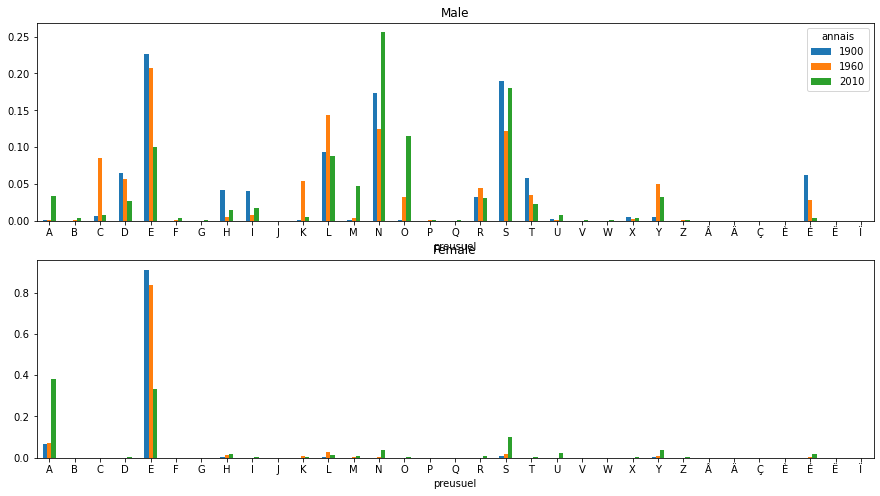

In [28]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(2, 1, figsize=(15, 8))
letter_prop[1].plot(kind='bar', rot=0, ax=axes[0], title='Male')
letter_prop[2].plot(kind='bar', rot=0, ax=axes[1], title='Female', legend=False)
plt.show()

## Expressions regulieres

In [29]:
import re
# We already used Regex for matching 3 digits strings :
# map_df[map_df.code_insee.str.contains("\d\d\d")]

string  = "cette chaine ne contient pas de série de 03 chiffres "


matches=re.findall("\d\d\d",string)

In [30]:
matches

[]

In [31]:
string2 = "cette chaine contient une série de 003 chiffres "

matches=re.findall("\d\d\d",string2)
matches

['003']

In [32]:
string3 = "cette chaine contient 002 séries de 003 chiffres "

matches=re.findall("\d\d\d",string3)
matches

['002', '003']

In [33]:
# CHERCHER REMPLACER
# re.sub(pattern, repl, string, max=0)
newstring=re.sub("\d\d\d","xxx",string3)
newstring

'cette chaine contient xxx séries de xxx chiffres '

In [34]:
# On peut aussi réutiliser les sous-chaines matchées en utilisant les parenthèses
# r"" est une RAW string. ça permet de ne pas avoir a échapper les caractères spéciaux
newstring=re.sub("\d\d(\d)",r"\1",string3)
newstring

'cette chaine contient 2 séries de 3 chiffres '

In [35]:
# Chaque partie de la regexp entre parenthèses matchée peut être réutilisée avec \1 \2 \3 etc..
# r"" python raw strings. 

newstring=re.sub("(\d)(\d)(\d)",r"\3\2\1",string3)
newstring

'cette chaine contient 200 séries de 300 chiffres '

In [36]:
# COMMENT FAIRE SI JE VEUX MATCHER N'IMPORTE QUEL CARACTERE ?
# . Matches any single character except newline.
# .* matches 0 or more occurences of any single charactere
# .+ matches 1 or more occurences of any single charactere

string4="le début est avant la fin"

#atches=re.findall(".*avant",string4)
#atches=re.findall("avant.*string4)

matches=re.findall(".* ",string4)
matches

['le début est avant la ']

In [64]:
string4="le début est avant la fin"
newstring=re.sub("(.*)( est )(.*)",r"\3\2\1",string4)
newstring

'avant la fin est le début'

In [37]:
# Attention, par défaut le caractère * est "greedy", il englobe tout ce qu'il peut
string4="le début est avant la fin"
newstring=re.findall("d.*t",string4)
newstring

['début est avant']

In [38]:
# Je peux rendre * "lazy" avec ?
newstring=re.findall("d.*?t",string4)
newstring

['début']

## WebScraping

In [39]:
!pip install requests

In [40]:
import requests as req         # module de requête http
url="https://www.laboiteverte.fr/"
page = req.request('get', url) # on récupère une page 
html = page.text              # on récupère le contenu html de la page

In [41]:
html

'<!DOCTYPE html>\n<html lang="fr-FR">\n<head>\n<meta charset="UTF-8">\n<meta name="viewport" content="width=device-width, initial-scale=1">\n<script src="/cdn-cgi/apps/head/0agGRwNEyRKP1HgMn3__FqQ_YLU.js"></script><link rel="profile" href="https://gmpg.org/xfn/11">\n<link rel="pingback" href="https://www.laboiteverte.fr/xmlrpc.php">\n<meta property="fb:pages" content="323359661529" />\n\n<title>La boite verte : Site de découverte sur la photographie, la science, les arts et tout ce qui est insolite.</title>\n<meta name="description" content="Une boite verte qui me sert à ranger des trucs sur la photographie, le design, la technologie, des vidéos, des artistes et des plein de choses insolites." />\n<meta name="robots" content="index, follow, max-snippet:-1, max-image-preview:large, max-video-preview:-1" />\n<link rel="canonical" href="https://www.laboiteverte.fr/" />\n<link rel="next" href="https://www.laboiteverte.fr/page/2/" />\n<meta property="og:locale" content="fr_FR" />\n<meta pro

In [42]:
type(html)

str

In [43]:
# c'est bien du texte, on peut appliquer les regexps.
# un lien html : 
# <a href="http://www.google.fr"> moteur de recherche </a>
# Récupérons tous les liens :

liens= re.findall("<a.*/a>",html)
liens

['<a class="skip-link screen-reader-text" href="#content">Aller au contenu</a>',
 '<a class="header-entry-logo" href="https://www.laboiteverte.fr/" rel="home"></a>',
 '<a href="https://www.laboiteverte.fr/" rel="home">La boite verte</a>',
 '<a href="https://www.laboiteverte.fr/category/art/">Arts</a>',
 '<a href="https://www.laboiteverte.fr/category/art/photographie/">Photographie</a>',
 '<a href="https://www.laboiteverte.fr/category/divers/">Divers</a>',
 '<a href="https://www.laboiteverte.fr/category/savoir/">Savoir</a>',
 '<a href="https://www.laboiteverte.fr/category/tech-sci/">Techno / Science</a>',
 '<a href="#">Recherche</a>',
 '<a class="page-numbers" href="https://www.laboiteverte.fr/page/2/">2</a>',
 '<a class="page-numbers" href="https://www.laboiteverte.fr/page/3/">3</a>',
 '<a class="page-numbers" href="https://www.laboiteverte.fr/page/285/">285</a>',
 '<a class="next page-numbers" href="https://www.laboiteverte.fr/page/2/">></a>',
 '<a href="/category/featured/"><div clas

In [44]:
len(liens)

25

In [45]:
# trouver les liens internes
[x for x in liens if re.findall(r"laboiteverte.fr",x)]   +   [x for x in liens if re.findall('href="/',x)]

# + joins lists

['<a class="header-entry-logo" href="https://www.laboiteverte.fr/" rel="home"></a>',
 '<a href="https://www.laboiteverte.fr/" rel="home">La boite verte</a>',
 '<a href="https://www.laboiteverte.fr/category/art/">Arts</a>',
 '<a href="https://www.laboiteverte.fr/category/art/photographie/">Photographie</a>',
 '<a href="https://www.laboiteverte.fr/category/divers/">Divers</a>',
 '<a href="https://www.laboiteverte.fr/category/savoir/">Savoir</a>',
 '<a href="https://www.laboiteverte.fr/category/tech-sci/">Techno / Science</a>',
 '<a class="page-numbers" href="https://www.laboiteverte.fr/page/2/">2</a>',
 '<a class="page-numbers" href="https://www.laboiteverte.fr/page/3/">3</a>',
 '<a class="page-numbers" href="https://www.laboiteverte.fr/page/285/">285</a>',
 '<a class="next page-numbers" href="https://www.laboiteverte.fr/page/2/">></a>',
 '<a href="/category/featured/"><div class="footer-link"><i class="icon-star-outline"></i><div class="footer-link-txt">Best-Of</div></div></a>',
 '<a hr

In [46]:
# trouver les liens exterieurs
liens= re.findall("<a.*/a>",html)

liste1=[ _ for _ in liens if not re.findall(r"laboiteverte.fr",_)]

liste2=[ _ for _ in liste1 if not re.findall(r'href="/',_) ]

liste3 =[ _ for _ in liste2 if not re.findall(r'href="#',_) ]

liste3

['<a rel="nofollow" target="_blank" href="https://plus.google.com/+laboiteverte/"><i class="icon-googleplus gg"></i></a>',
 '<a rel="nofollow" target="_blank" href="https://twitter.com/LaBoiteVerte"><i class="icon-twitter tw"></i></a>',
 '<a rel="nofollow" target="_blank" href="https://www.facebook.com/LaBoiteVerte"><i class="icon-facebook fb"></i></a>',
 '<a rel="nofollow" target="_blank" href="http://laboiteverte.tumblr.com/"><i class="icon-tumblr tu"></i></a>']

### Using Beautiful Soup

In [75]:
# https://www.w3schools.com/cssref/css_selectors.asp

In [47]:
!pip install bs4
from bs4 import BeautifulSoup
soup = BeautifulSoup(html)

  Created wheel for bs4: filename=bs4-0.0.1-py3-none-any.whl size=1272 sha256=1ed9b859cedbab5af789591ea3bae4ff138fac3af31c42fe3f14e285ab76bfd1
  Stored in directory: /Users/J-Luc/Library/Caches/pip/wheels/75/78/21/68b124549c9bdc94f822c02fb9aa3578a669843f9767776bca
Successfully built bs4


In [48]:
selector = "a"
bsliens    = soup.find_all(selector)
len(bsliens)

74

In [49]:
bsliens

[<a class="skip-link screen-reader-text" href="#content">Aller au contenu</a>,
 <a class="header-entry-logo" href="https://www.laboiteverte.fr/" rel="home"></a>,
 <a href="https://www.laboiteverte.fr/" rel="home">La boite verte</a>,
 <a href="https://www.laboiteverte.fr/category/art/">Arts</a>,
 <a href="https://www.laboiteverte.fr/category/art/photographie/">Photographie</a>,
 <a href="https://www.laboiteverte.fr/category/divers/">Divers</a>,
 <a href="https://www.laboiteverte.fr/category/savoir/">Savoir</a>,
 <a href="https://www.laboiteverte.fr/category/tech-sci/">Techno / Science</a>,
 <a href="#">Recherche</a>,
 <a class="post-a-box" href="https://www.laboiteverte.fr/les-ombres-dun-cube/">
 <div class="entry-content">
 <img alt="" class="attachment-tb-wl size-tb-wl wp-post-image" data-attachment-id="50199" data-comments-opened="1" data-image-description="" data-image-meta='{"aperture":"0","credit":"","camera":"","caption":"","created_timestamp":"0","copyright":"","focal_length":"0

In [50]:
liens= re.findall("<a.*?/a>",html,re.DOTALL)
len(liens), len(bsliens)

(74, 74)

In [51]:
selector = "img"
imgs    = soup.find_all(selector)
len(imgs)

48

In [52]:
type(imgs)

bs4.element.ResultSet

In [53]:
type(imgs[0])

bs4.element.Tag

In [54]:
imgs[0]['src']

'https://www.laboiteverte.fr/wp-content/uploads/2014/12/cube-ombre-01-870x652.jpg'

In [55]:
img_src= [img['src'] for img in imgs]
img_src

['https://www.laboiteverte.fr/wp-content/uploads/2014/12/cube-ombre-01-870x652.jpg',
 'https://www.laboiteverte.fr/wp-content/uploads/2015/09/reve-petros-koublis-01-464x261.jpg',
 'https://www.laboiteverte.fr/wp-content/uploads/2013/09/Le_Gras_Joseph_Nicéphore_Niépce-720x5001.jpg',
 'https://www.laboiteverte.fr/wp-content/uploads/2020/09/Screenshot_6-480x320.png',
 'https://www.laboiteverte.fr/wp-content/uploads/2020/09/mineralogie-exploration-01-480x320.jpg',
 'https://www.laboiteverte.fr/wp-content/uploads/2020/09/Screenshot_5-480x320.png',
 'https://www.laboiteverte.fr/wp-content/uploads/2020/08/escalier-arc-01-480x320.jpg',
 'https://www.laboiteverte.fr/wp-content/uploads/2020/08/maisons-oubli-01-480x320.jpg',
 'https://www.laboiteverte.fr/wp-content/uploads/2020/08/ghibli-decoupe-02-480x320.jpg',
 'https://www.laboiteverte.fr/wp-content/uploads/2020/08/anses-01-480x320.jpg',
 'https://www.laboiteverte.fr/wp-content/uploads/2020/08/sign-of-times-01-480x320.png',
 'https://www.laboi

In [56]:
selector = "entry-content"
nodes    = soup.find_all(class_=selector) # class is a python reserved keyword, that's why the name of the param is class_
len(nodes)

47

In [59]:
selector = "entry-title"
nodes    = soup.find_all(class_=selector) # class is a python reserved keyword, that's why the name of the param is class_
len(nodes)

47

In [60]:
type(nodes)

bs4.element.ResultSet

In [61]:
nodes

[<span class="entry-title">Les ombres d’un cube</span>,
 <span class="entry-title">Le rêve éveillé de Petros Koublis</span>,
 <span class="entry-title">La première photographie</span>,
 <span class="entry-title">Patience et splendeurs chez une papetière</span>,
 <span class="entry-title">2242 illustrations minéralogiques à explorer en HD (et le making of)</span>,
 <span class="entry-title">Un orgue électronique très « chouette »</span>,
 <span class="entry-title">Elles ont tué le game de l’escalier arc en ciel</span>,
 <span class="entry-title">387 petites maisons presque oubliées</span>,
 <span class="entry-title">Ghibli en papier délicatement peint et découpé</span>,
 <span class="entry-title">La guerre de cent anses</span>,
 <span class="entry-title">« Signe des temps, temps du signe » par Hanne Darboven et Ruth Wolf-Rehfeldt</span>,
 <span class="entry-title">La faune et la flore rhabillées par Bill Meyer</span>,
 <span class="entry-title">The Masked Series par Inge Morath et Saul 

In [62]:
for child in nodes[0].children:
    try:
        print(child)
    except Exception as e:
        pass

Les ombres d’un cube


In [63]:
selector = "site"
nodes    = soup.find_all(class_=selector) # class is a python reserved keyword, that's why the name of the param is class_
len(nodes)

1

In [64]:
for child in nodes[0].children:
    try:
        print("-"*20)
        print(child)
    except Exception as e:
        pass

--------------------


--------------------
<a class="skip-link screen-reader-text" href="#content">Aller au contenu</a>
--------------------


--------------------
<header class="site-header" id="masthead" role="banner">
<div class="site-branding">
<div class="header-menu-ico"></div>
<a class="header-entry-logo" href="https://www.laboiteverte.fr/" rel="home"></a>
<h1 class="site-title"><a href="https://www.laboiteverte.fr/" rel="home">La boite verte</a></h1>
<div class="header-search-ico"></div>
</div>
<nav class="main-navigation" id="site-navigation" role="navigation">
<ul class="menu" id="primary-menu"><li class="color-art menu-item menu-item-type-taxonomy menu-item-object-category menu-item-65802" id="menu-item-65802"><span><a href="https://www.laboiteverte.fr/category/art/">Arts</a></span></li>
<li class="color-photo menu-item menu-item-type-taxonomy menu-item-object-category menu-item-65803" id="menu-item-65803"><span><a href="https://www.laboiteverte.fr/category/art/photographie

In [97]:
<html>
    <head>
    
    </head>
    <body>
    
    </body>
</html>

SyntaxError: invalid syntax (<ipython-input-97-b3e52577d099>, line 1)

In [65]:
head=soup.head
head

<head>
<meta charset="utf-8"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<script src="/cdn-cgi/apps/head/0agGRwNEyRKP1HgMn3__FqQ_YLU.js"></script><link href="https://gmpg.org/xfn/11" rel="profile"/>
<link href="https://www.laboiteverte.fr/xmlrpc.php" rel="pingback"/>
<meta content="323359661529" property="fb:pages"/>
<title>La boite verte : Site de découverte sur la photographie, la science, les arts et tout ce qui est insolite.</title>
<meta content="Une boite verte qui me sert à ranger des trucs sur la photographie, le design, la technologie, des vidéos, des artistes et des plein de choses insolites." name="description"/>
<meta content="index, follow, max-snippet:-1, max-image-preview:large, max-video-preview:-1" name="robots"/>
<link href="https://www.laboiteverte.fr/" rel="canonical"/>
<link href="https://www.laboiteverte.fr/page/2/" rel="next"/>
<meta content="fr_FR" property="og:locale"/>
<meta content="website" property="og:type"/>
<meta content="La b

In [66]:
body=soup.body
for child in body.children:
    try:
        print(child)
        print("-" * 20)
    except Exception as e:
        pass

<div id="fb-root"></div>
--------------------


--------------------
<script>(function(d, s, id) {
  var js, fjs = d.getElementsByTagName(s)[0];
  if (d.getElementById(id)) return;
  js = d.createElement(s); js.id = id;
  js.src = "//connect.facebook.net/fr_FR/sdk.js#xfbml=1&version=v2.6&appId=450562218296858";
  fjs.parentNode.insertBefore(js, fjs);
}(document, 'script', 'facebook-jssdk'));</script>
--------------------


--------------------
<div class="site" id="page">
<a class="skip-link screen-reader-text" href="#content">Aller au contenu</a>
<header class="site-header" id="masthead" role="banner">
<div class="site-branding">
<div class="header-menu-ico"></div>
<a class="header-entry-logo" href="https://www.laboiteverte.fr/" rel="home"></a>
<h1 class="site-title"><a href="https://www.laboiteverte.fr/" rel="home">La boite verte</a></h1>
<div class="header-search-ico"></div>
</div>
<nav class="main-navigation" id="site-navigation" role="navigation">
<ul class="menu" id="primary-menu

## Real world Use case Meteo

In [67]:
url   = "https://www.infoclimat.fr/observations-meteo/archives/7/septembre/2019/paris-montsouris/07156.html"
page  = req.request("get", url )
html  = page.text
soup  = BeautifulSoup(html)

In [68]:
import webbrowser
import os
os.getcwd()


with open("meteo.html", "a", encoding="utf8") as f:
    f.writelines(html)

webbrowser.open(os.getcwd()+"meteo.html")

True

In [102]:
# il faut bien comprendre la structure d'une table html:
# <table><tr><td></td><td></td><td></td></tr><tr> ....  </table>
table standard html :
    
    <table>
        <tr>
            <th> Title </th>
            <td> texte </td>
            <td> texte </td>
        </tr>
        <tr>
            <th> Title </th>
            <td> texte </td>
            <td> texte </td>
        </tr>
    </table>

SyntaxError: invalid syntax (<ipython-input-102-2abe81f16897>, line 3)

In [69]:
# pour matcher toutes les lignes du tableau  ( <tr></tr>): 
selector = '#resptable-releves > tbody > tr'
table_row    = soup.select(selector)
table_row

[<tr>
 <!-- heure -->
 <th style="font-size:1.25em">
 <span class="tipsy-trigger" title="Heure réelle d'émission :&lt;br /&gt;07/09/2019&lt;br /&gt;&lt;b&gt;23h00 UTC&lt;/b&gt;">01h</span> </th>
 <!-- plus -->
 <td style="padding:2px 4px">
 <a href="/stations-meteo/image_mf.php?id=07156&amp;dh=2019-09-07 23:00:00&amp;token=c4ed9a102041e501379648bfb09f3e8b" target="_blank"><i class="material-icons">add_circle_outline</i></a>
 </td>
 <td style="/*background-color:rgba(0,0,0,0.1)*/"><span class="tipsy-trigger" style="font-weight:bold;display:inline-block;font-size:16px" title="&lt;div&gt;Minimale sur 1h : 13.9°C à 22:53 UTC&lt;/div&gt;&lt;div&gt;Maximale sur 1h : 14.3°C à 22:01 UTC&lt;/div&gt;">13.9</span> <span class="tab-units-v">°C</span><span class="color-heatmap" style="background-color:rgb(245,255,25)"></span> <div style="font-size:9px; margin-bottom: -8px">
 <span style="color:#081dbb">13.9</span> → <span style="color:#841910">14.3</span>
 </div></td><td>0 <span class="tab-units-v"

In [105]:
#https://www.w3schools.com/cssref/css_selectors.asp

In [70]:
len(table_row)

24

In [140]:
!pip install bs4

In [72]:
selector="#resptable-releves > tbody > tr:nth-child(1) > td:nth-child(3) > span.tipsy-trigger"
soup.select(selector)[0].text

'13.9'

In [71]:
# Pour matcher une cellule située à une ligne et colonne spécifique du tableau :

selector="#resptable-releves > tbody > tr:nth-of-type(1) > td:nth-of-type(3) "
soup.select(selector)[0].text

'0 mm/1h'

In [73]:
soup.select(selector)[0].text

'13.9'

In [74]:
# Toutes les cellules du tableau :

for ligne in range(len(table_row)+1):
    print("=" * 10)
    for col in range(1,10): # il y a 10 colonnes a scraper
        print("-" * 10 )
        try:
            print(f"ligne : {ligne} colonne : {col}" )
            selector=f"#resptable-releves > tbody > tr:nth-of-type({ligne}) > td:nth-of-type({col}) "
            print(soup.select(selector)[0].text)
        except Exception as e:
            print(e)

----------
ligne : 0 colonne : 1
list index out of range
----------
ligne : 0 colonne : 2
list index out of range
----------
ligne : 0 colonne : 3
list index out of range
----------
ligne : 0 colonne : 4
list index out of range
----------
ligne : 0 colonne : 5
list index out of range
----------
ligne : 0 colonne : 6
list index out of range
----------
ligne : 0 colonne : 7
list index out of range
----------
ligne : 0 colonne : 8
list index out of range
----------
ligne : 0 colonne : 9
list index out of range
----------
ligne : 1 colonne : 1

add_circle_outline

----------
ligne : 1 colonne : 2
13.9 °C 
13.9 → 14.3

----------
ligne : 1 colonne : 3
0 mm/1h
----------
ligne : 1 colonne : 4
14 km/hraf.32.4 

----------
ligne : 1 colonne : 5
76%
----------
ligne : 1 colonne : 6

----------
ligne : 1 colonne : 7
9.7 °C
----------
ligne : 1 colonne : 8
1023hPa
----------
ligne : 1 colonne : 9
20 km
----------
ligne : 2 colonne : 1

add_circle_outline

----------
ligne : 2 colonne : 2
14.3 °C 


add_circle_outline

----------
ligne : 20 colonne : 2
14.8 °C 
14.7 → 14.8

----------
ligne : 20 colonne : 3
0 mm/1h
----------
ligne : 20 colonne : 4
7 km/hraf.26.3 

----------
ligne : 20 colonne : 5
83%
----------
ligne : 20 colonne : 6

----------
ligne : 20 colonne : 7
11.9 °C
----------
ligne : 20 colonne : 8
1020.4hPa
----------
ligne : 20 colonne : 9
20 km
----------
ligne : 21 colonne : 1

add_circle_outline

----------
ligne : 21 colonne : 2
14.7 °C 
14.6 → 14.7

----------
ligne : 21 colonne : 3
0 mm/1h
----------
ligne : 21 colonne : 4
11 km/hraf.21.2 

----------
ligne : 21 colonne : 5
82%
----------
ligne : 21 colonne : 6

----------
ligne : 21 colonne : 7
11.7 °C
----------
ligne : 21 colonne : 8
1020.7hPa
----------
ligne : 21 colonne : 9
20 km
----------
ligne : 22 colonne : 1

add_circle_outline

----------
ligne : 22 colonne : 2
14.6 °C 
14.6 → 15

----------
ligne : 22 colonne : 3
0 mm/1h
----------
ligne : 22 colonne : 4
11 km/hraf.21.6 

----------
ligne : 22 co

In [77]:
# on retire l'affichage et on met le tout dans un DF
import pandas as pd
df=pd.DataFrame()

for ligne in range(1,len(table_row)+1):
    values=[]
    for col in range(1,11): # il y a 10 colonnes a scraper
        selector=f"#resptable-releves > tbody > tr:nth-child({ligne}) > :nth-child({col}) > span"
        try:
                values.append(soup.select(selector)[0].text)
        except Exception as e:
            values.append("")
    df[ligne]=values

df

,1,2,3,4,5,6,7,8,9,10,...,15,16,17,18,19,20,21,22,23,24
0,01h,00h,23h,22h,21h,20h,19h,18h,17h,16h,...,11h,10h,09h,08h,07h,06h,05h,04h,03h,02h
1,,,,,,,,,,,...,,,,,,,,,,
2,13.9,14.3,14.9,14.8,15.4,16.8,17.7,17.8,18.3,18.3,...,16.0,15.6,14.9,14.3,14.4,14.8,14.7,14.6,15.0,15.8
3,mm/1h,mm/1h,mm/1h,mm/1h,mm/1h,mm/1h,mm/1h,mm/1h,mm/1h,mm/1h,...,mm/1h,mm/1h,mm/1h,mm/1h,mm/1h,mm/1h,mm/1h,mm/1h,mm/1h,mm/1h
4,14,18,14,18,14,22,18,18,14,18,...,11,7,7,7,7,7,11,11,11,14
5,76,73,69,67,62,59,51,51,49,52,...,76,81,84,86,85,83,82,80,77,69
6,,,,,,,,,,,...,,,,,,,,,,
7,9.7,9.5,9.3,8.7,8.2,8.7,7.4,7.5,7.4,8.3,...,11.8,12.3,12.2,12,11.9,11.9,11.7,11.2,11,10.1
8,hPa,hPa,hPa,hPa,hPa,hPa,hPa,hPa,hPa,hPa,...,hPa,hPa,hPa,hPa,hPa,hPa,hPa,hPa,hPa,hPa
9,km,km,km,km,km,km,km,km,km,km,...,km,km,km,km,km,km,km,km,km,km


In [76]:
# on retire l'affichage et on met le tout dans un DF
import pandas as pd
df=pd.DataFrame()

for ligne in range(1,len(table_row)+1):
    values=[]
    for col in range(1,11): # il y a 10 colonnes a scraper
        selector=f"#resptable-releves > tbody > tr:nth-of-type({ligne}) > td:nth-of-type({col}) > span"
        try:
                values.append(soup.select(selector)[0].text)
        except Exception as e:
            values.append("")
    df[ligne]=values

df

,1,2,3,4,5,6,7,8,9,10,...,15,16,17,18,19,20,21,22,23,24
0,,,,,,,,,,,...,,,,,,,,,,
1,13.9,14.3,14.9,14.8,15.4,16.8,17.7,17.8,18.3,18.3,...,16.0,15.6,14.9,14.3,14.4,14.8,14.7,14.6,15.0,15.8
2,mm/1h,mm/1h,mm/1h,mm/1h,mm/1h,mm/1h,mm/1h,mm/1h,mm/1h,mm/1h,...,mm/1h,mm/1h,mm/1h,mm/1h,mm/1h,mm/1h,mm/1h,mm/1h,mm/1h,mm/1h
3,14,18,14,18,14,22,18,18,14,18,...,11,7,7,7,7,7,11,11,11,14
4,76,73,69,67,62,59,51,51,49,52,...,76,81,84,86,85,83,82,80,77,69
5,,,,,,,,,,,...,,,,,,,,,,
6,9.7,9.5,9.3,8.7,8.2,8.7,7.4,7.5,7.4,8.3,...,11.8,12.3,12.2,12,11.9,11.9,11.7,11.2,11,10.1
7,hPa,hPa,hPa,hPa,hPa,hPa,hPa,hPa,hPa,hPa,...,hPa,hPa,hPa,hPa,hPa,hPa,hPa,hPa,hPa,hPa
8,km,km,km,km,km,km,km,km,km,km,...,km,km,km,km,km,km,km,km,km,km
9,,,,,,,,,,,...,,,,,,,,,,


In [78]:
# nous avons créé le DF colonne par colonne, mais il est plus simple d'inverser lignes et colonnes
df=df.T
df

,0,1,2,3,4,5,6,7,8,9
1,01h,,13.9,mm/1h,14,76,,9.7,hPa,km
2,00h,,14.3,mm/1h,18,73,,9.5,hPa,km
3,23h,,14.9,mm/1h,14,69,,9.3,hPa,km
4,22h,,14.8,mm/1h,18,67,,8.7,hPa,km
5,21h,,15.4,mm/1h,14,62,,8.2,hPa,km
6,20h,,16.8,mm/1h,22,59,,8.7,hPa,km
7,19h,,17.7,mm/1h,18,51,,7.4,hPa,km
8,18h,,17.8,mm/1h,18,51,,7.5,hPa,km
9,17h,,18.3,mm/1h,14,49,,7.4,hPa,km
10,16h,,18.3,mm/1h,18,52,,8.3,hPa,km


In [79]:
# On récupère les en-têtes de colonne
headers = soup.select("#resptable-releves > thead > tr > th")
headers

[<th style="">
                 Heure locale
                             </th>,
 <th><!--plus--></th>,
 <th><a class="tipsy-trigger white-text" href="javascript:void(0)" title="Température sous abri normalisé,&lt;br /&gt;relevée entre 1m50 et 2m du sol">Tempé<span class="hide-on-small-only">rature</span></a></th>,
 <th><a class="tipsy-trigger white-text" href="javascript:void(0)" title="Précipitations tombées en 1h">Pluie</a></th>,
 <th><a class="tipsy-trigger white-text" href="javascript:void(0)" title="Vent moyen et en rafales, observé à 10m">Vent</a></th>,
 <th><a class="tipsy-trigger white-text" href="javascript:void(0)" title="Humidité relative">Humidité</a></th>,
 <th><a class="tipsy-trigger white-text" href="javascript:void(0)" title="&lt;b&gt;Température ressentie&lt;/b&gt;&lt;br /&gt;Elle correspond au windchill (indice de refroidissement éolien) lorsque la température est inférieure à 10°C, et à l'humidex (indice de chaleur) lorsque la température est supérieure à 20°C. &lt;

In [80]:
nom_des_colonnes = [header.get_text().strip() for header in headers]
nom_des_colonnes

['Heure locale',
 '',
 'Température',
 'Pluie',
 'Vent',
 'Humidité',
 'Bio-météo',
 'Pt.\xa0de rosée',
 'Pression',
 'Visibilité']

In [81]:
# je renomme certaine colonnes pour y accéder plus facilement

nom_des_colonnes=['Heure',
 '',
 'Temp',
 'Pluie',
 'Vent',
 'Humidité',
 'Biometeo',
 'Ptderosée',
 'Pression',
 'Visibilité']
df.columns = nom_des_colonnes 
df

,Heure,,Temp,Pluie,Vent,Humidité,Biometeo,Ptderosée,Pression,Visibilité
1,01h,,13.9,mm/1h,14,76,,9.7,hPa,km
2,00h,,14.3,mm/1h,18,73,,9.5,hPa,km
3,23h,,14.9,mm/1h,14,69,,9.3,hPa,km
4,22h,,14.8,mm/1h,18,67,,8.7,hPa,km
5,21h,,15.4,mm/1h,14,62,,8.2,hPa,km
6,20h,,16.8,mm/1h,22,59,,8.7,hPa,km
7,19h,,17.7,mm/1h,18,51,,7.4,hPa,km
8,18h,,17.8,mm/1h,18,51,,7.5,hPa,km
9,17h,,18.3,mm/1h,14,49,,7.4,hPa,km
10,16h,,18.3,mm/1h,18,52,,8.3,hPa,km


In [82]:
# On supprime le h à la fin des heures
df.Heure=df.Heure.apply(lambda h: h.replace("h",""))

In [83]:
selector="#resptable-releves > tbody > tr:nth-child(1) > td:nth-child(3) > span.tipsy-trigger"
soup.select(selector)[0].text
df["Humidité"]=df["Humidité"].astype(float)

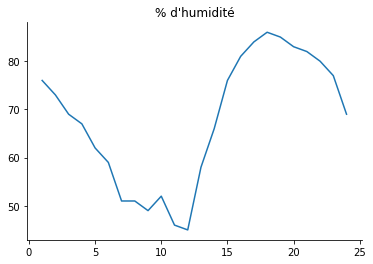

In [84]:
%matplotlib inline
import seaborn as sns
df.Humidité.plot(title="% d'humidité")
sns.despine()
df["Temp"]=df["Temp"].astype(float)

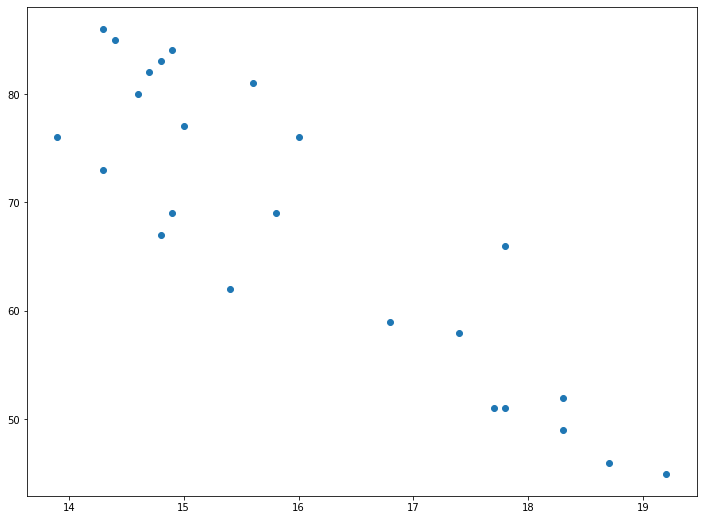

In [85]:
## Regression linéaire

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12.0, 9.0)

# Preprocessing Input data
#data = pd.read_csv('data.csv')

#X = df.iloc[:, 1]
#Y = df.iloc[:, 4]

X = df.Temp
Y = df.Humidité

plt.scatter(X, Y)
plt.show()

In [86]:
# Building the model
X_mean = np.mean(X)
Y_mean = np.mean(Y)

num = 0
den = 0
for i in range(1,len(X)+1):
    print(i)
    num += (X[i] - X_mean)*(Y[i] - Y_mean)
    den += (X[i] - X_mean)**2
m = num / den
c = Y_mean - m*X_mean

print (m, c)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
-7.3019365037544475 185.04859702279018


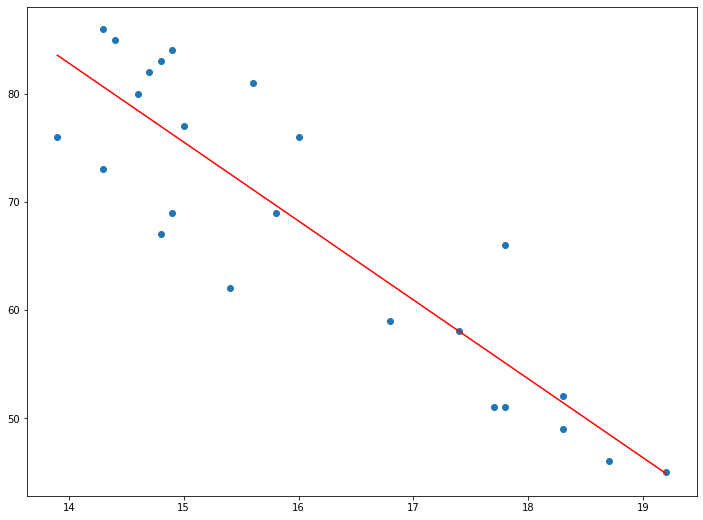

In [87]:
# Making predictions
Y_pred = m*X + c
Y_pred
plt.scatter(X, Y) # actual
# plt.scatter(X, Y_pred, color='red')
plt.plot([min(X), max(X)], [max(Y_pred), min(Y_pred)], color='red') # predicted
plt.show()

In [150]:
chrome://version/
Pour avoir la version Chrome pour selenium 
https://chromedriver.chromium.org/downloads

SyntaxError: invalid syntax (<ipython-input-150-af82d10e994e>, line 1)

## Selenium

In [105]:
!pip install selenium

In [106]:

import selenium
from selenium import webdriver
path   = "/Users/J-Luc/Desktop/Esilv5A/PythonForDA/chromedriver"
driver = webdriver.Chrome(executable_path=path)


In [107]:
url_insta = "https://www.instagram.com/accounts/login/?hl=fr&source=auth_switcher"
driver.get(url_insta)

In [125]:
USER_ID="jl_chsl"
USER_PASSWORD=""
css_selector = "input[name='username']"
input_name = driver.find_element_by_css_selector(css_selector)
input_name.send_keys(USER_ID)

In [126]:
css_selector = "input[name='password']"
input_name = driver.find_element_by_css_selector(css_selector)
input_name.send_keys(USER_PASSWORD)

In [127]:
css_selector = "button[type='submit']"
button       = driver.find_element_by_css_selector(css_selector)
button.click()

#### le code qui passe le popup des cookies
xpath="/html/body/div[2]/div/div/div/div[2]/button[1]"

popup = driver.find_element_by_xpath(xpath)

popup.click()

In [128]:
hashtag = '#basketball'

In [134]:
css_selector = "input[placeholder='Rechercher']"
search_bar = driver.find_element_by_css_selector(css_selector)
search_bar.clear()

In [135]:
search_bar.send_keys(hashtag)

In [136]:
from selenium.webdriver.common.keys import Keys
search_bar.send_keys(Keys.ENTER)